# Repressilator

Understanding a model from the literature/model repository
https://wwwdev.ebi.ac.uk/biomodels/

* Visualize model
* Create a model SBML report
* Simulate model with tellurium
* Change parameters
* Run stochastic simulations

The model is described at
https://www.ebi.ac.uk/biomodels-main/static-pages.do?page=ModelMonth%2F2006-07

and in the publication [here](../literature/Elowitz2000.pdf)

One of the major goals of Systems Biology is the elucidation of the control logic which determines the behaviour of naturally occuring biological systems[1]. To this end, Systems Biologist often create mathematical models designed to mimic a carefully observed biological system. Traditionally, the modeller aquires data, creates his model and tests the model against the available data. In an interesting take on the conventional way of modelling, Elowitz and Leibler[2] built a mathematical model of transcription regulation describing a cyclic negative-feedback loop made up of three repressor genes and their promoters. They used this model to determine the important parameters of the system and predict the systems behaviour, paying particular attention to parameter values that would cause the system to enter an unstable state leading to oscillatory behaviour. Finally the authors artifically reconstructd the system in E. coli using standard molecular biological approaches. In effect, rather than observing a natural system and explaining it in mathematical terms, the authors create a mathematical model to aid construction of an artificial control circiut. The result is an oscillating network which does not occur in nature, which the authors termed the Repressilator.

![repres1](./images/repres1.png)

The authors created a simple mathematical model of transcription regulation. The mathematical model was composed of six molecular species: three mRNA concentrations and three corresponding repressor protein concentrations. Each species was involved in transcription, translation and degradation reactions. Six coupled first-order differential equations described the dynamic behaviour of the system. Using the model, the authors predicted what parameters the stability of the steady state would be dependent on. In particular, the authors used the model to determine how to induce stable oscillations. Parameters that would favour oscillations were strong promoters, strong repression of transcription, cooperativity of repressor binding and similar lifetimes of mRNA and Proteins. The actual synthetic biological system was constructed from natural components using molecular biological techniques. Two alterations two the natural components were made to bring the system in line with the parameter space which favours oscillations: strong but tightly repressable hybrid promoters, and carboxy-terminal tags for the repressor proteins thus targetting them for protease degradation. A compatible reporter plasmid expressing GFP was also inserted into the system. 

![repres2](./images/repres2.png)

The temporal oscillations of fluorescence occured with a period of approximately 150 minutes, three times as long as the average cell-division time. Additionally, although sibling cells displayed correlated GFP levels for a long period of time after septation, there were variations in both period and amplitude.

Elowitz and Leibler are an excellent example of the use of mathematical models to design artificial control circuits. These can be either used as components for biotechnology and synthetic biology, or used to further study and understand properties of naturally evolved control elements.
Bibliographic References

* [1] Kitano H (2002) Systems Biology: A Brief Overview. Science 295: 1662-1664.
* [2] Elowitz MB, Leibler S (2000) A synthetic oscillatory network of transcriptional regulators. Nature 403: 335-338.

## Listing model content (libsbml)

In [1]:
import libsbml
doc = libsbml.readSBMLFromFile('./models/repressilator.xml')
model = doc.getModel()
print(model)
print()

for s in model.getListOfSpecies():
    print(s)
print()

for r in model.getListOfReactions():
    print(r)

<Model BIOMD0000000012 "Elowitz2000 - Repressilator">

<Species PX "LacI protein">
<Species PY "TetR protein">
<Species PZ "cI protein">
<Species X "LacI mRNA">
<Species Y "TetR mRNA">
<Species Z "cI mRNA">

<Reaction Reaction1 "degradation of LacI transcripts">
<Reaction Reaction2 "degradation of TetR transcripts">
<Reaction Reaction3 "degradation of CI transcripts">
<Reaction Reaction4 "translation of LacI">
<Reaction Reaction5 "translation of TetR">
<Reaction Reaction6 "translation of CI">
<Reaction Reaction7 "degradation of LacI">
<Reaction Reaction8 "degradation of TetR">
<Reaction Reaction9 "degradation of CI">
<Reaction Reaction10 "transcription of LacI">
<Reaction Reaction11 "transcription of TetR">
<Reaction Reaction12 "transcription of CI">


## Model report
HTML overview over the SBML content in a more human readabile manner to understand the model.

In [2]:
import sbmlutils
from sbmlutils.report import sbmlreport
sbmlreport.create_sbml_report("./models/repressilator.xml", out_dir="./models/")

E0: SBML unit consistency (core, L509, code)  
------------------------------------------------------------
[Warning] Missing unit declarations on parameters or literal numbers in expression
In situations where a mathematical expression contains literal numbers or parameters whose units have not been declared, it is not possible to verify accurately the consistency of the units in the expression. 
 The units of the <assignmentRule> <math> expression 'tau_mRNA / log(2)' cannot be fully checked. Unit consistency reported as either no errors or further unit errors related to this object may not be accurate.


E1: SBML unit consistency (core, L521, code)  
------------------------------------------------------------
[Warning] Missing unit declarations on parameters or literal numbers in expression
In situations where a mathematical expression contains literal numbers or parameters whose units have not been declared, it is not possible to verify accurately the consistency of the units in th

## Listing model content

In [2]:
import libsbml
doc = libsbml.readSBMLFromFile('./models/repressilator.xml')
model = doc.getModel()
print(model)
print()

for s in model.getListOfSpecies():
    print(s)
print()

for r in model.getListOfReactions():
    print(r)

<Model BIOMD0000000012 "Elowitz2000 - Repressilator">

<Species PX "LacI protein">
<Species PY "TetR protein">
<Species PZ "cI protein">
<Species X "LacI mRNA">
<Species Y "TetR mRNA">
<Species Z "cI mRNA">

<Reaction Reaction1 "degradation of LacI transcripts">
<Reaction Reaction2 "degradation of TetR transcripts">
<Reaction Reaction3 "degradation of CI transcripts">
<Reaction Reaction4 "translation of LacI">
<Reaction Reaction5 "translation of TetR">
<Reaction Reaction6 "translation of CI">
<Reaction Reaction7 "degradation of LacI">
<Reaction Reaction8 "degradation of TetR">
<Reaction Reaction9 "degradation of CI">
<Reaction Reaction10 "transcription of LacI">
<Reaction Reaction11 "transcription of TetR">
<Reaction Reaction12 "transcription of CI">


## Import model & run simulation
The first simulation experiment with the model reproduces the oscillation behavior of the model shown in Figure~1c of the reference publication. This simulation experiment can be described as:

* Import the repressilator model identified by the Unified Resource Identifier (URI)  `urn:miriam:biomodels.db:BIOMD0000000012`
* Select a deterministic simulation method for the numerical integration.
* Run a uniform time course simulation for 1000~min with an output interval of 1~min.
* Plot the amount of `lacI`, `tetR` and `cI` mRNA and protein against time in a 2D Plot

In [3]:
%matplotlib inline
import numpy as np
import pandas as pd

import tellurium as te
te.setDefaultPlottingEngine('matplotlib')

import matplotlib
from matplotlib import pyplot as plt
plt.rcParams.update({
        'axes.labelsize': 'large', 
        'axes.labelweight': 'bold',
        'axes.titlesize': 'large',
        'axes.titleweight': 'bold',
        'legend.fontsize': 'small',
        'xtick.labelsize': 'large',
        'ytick.labelsize': 'large',
    })
from IPython.display import display, HTML

/home/mkoenig/envs/libsbml/lib/python3.5/site-packages/tellurium/tellurium.py:40: UserWarning: 
This call to matplotlib.use() has no effect because the backend has already
been chosen; matplotlib.use() must be called *before* pylab, matplotlib.pyplot,
or matplotlib.backends is imported for the first time.

The backend was *originally* set to 'module://ipykernel.pylab.backend_inline' by the following code:
  File "/usr/lib/python3.5/runpy.py", line 184, in _run_module_as_main
    "__main__", mod_spec)
  File "/usr/lib/python3.5/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "/home/mkoenig/envs/libsbml/lib/python3.5/site-packages/ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "/home/mkoenig/envs/libsbml/lib/python3.5/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "/home/mkoenig/envs/libsbml/lib/python3.5/site-packages/ipykernel/kernelapp.py", line 486, in start
    self.io_loop.st

In [4]:
# Load model from biomodels (may not work with https).
# r = te.loadSBMLModel("http://biomodels.caltech.edu/download?mid=BIOMD0000000012")
r = te.loadSBMLModel("./models/repressilator.xml")

# print the content of the model (antimony)
print(te.sbmlToAntimony(r.getSBML()))

// Created by libAntimony v2.9.4
model *BIOMD0000000012()

  // Compartments and Species:
  compartment cell;
  substanceOnly species PX in cell, PY in cell, PZ in cell, X in cell, Y in cell;
  substanceOnly species Z in cell;

  // Assignment Rules:
  beta := tau_mRNA/tau_prot;
  alpha0 := a0_tr*eff*tau_prot/(ln(2)*KM);
  a0_tr := ps_0*60;
  alpha := a_tr*eff*tau_prot/(ln(2)*KM);
  a_tr := (ps_a - ps_0)*60;
  t_ave := tau_mRNA/ln(2);
  kd_mRNA := ln(2)/tau_mRNA;
  kd_prot := ln(2)/tau_prot;
  k_tl := eff/t_ave;

  // Reactions:
  Reaction1: X => ; kd_mRNA*X;
  Reaction2: Y => ; kd_mRNA*Y;
  Reaction3: Z => ; kd_mRNA*Z;
  Reaction4:  => PX; k_tl*X;
  Reaction5:  => PY; k_tl*Y;
  Reaction6:  => PZ; k_tl*Z;
  Reaction7: PX => ; kd_prot*PX;
  Reaction8: PY => ; kd_prot*PY;
  Reaction9: PZ => ; kd_prot*PZ;
  Reaction10:  => X; a0_tr + a_tr*KM^n/(KM^n + PZ^n);
  Reaction11:  => Y; a0_tr + a_tr*KM^n/(KM^n + PX^n);
  Reaction12:  => Z; a0_tr + a_tr*KM^n/(KM^n + PY^n);

  // Species initializa

,time,[PX],[PY],[PZ],[X],[Y],[Z]
0,0.0,0.000000,0.000000,0.000000,0.000000,20.000000,0.000000
1,1.0,81.440426,188.382020,42.641364,19.903426,30.615526,7.491014
2,2.0,218.538704,358.026782,84.588884,21.233519,23.608864,5.866252
3,3.0,337.622362,469.625864,113.054468,18.544097,17.234851,4.403620
4,4.0,428.938247,536.662776,131.034639,15.559775,12.482022,3.295798
5,5.0,495.496746,572.016986,141.441148,13.017936,9.037664,2.485661
6,6.0,542.465621,585.396059,146.531395,11.033627,6.564237,1.902649
7,7.0,574.777459,583.829764,147.976509,9.561472,4.795373,1.488364
8,8.0,596.569596,572.333053,146.992677,8.518859,3.533290,1.198351
9,9.0,611.138967,554.451402,144.457992,7.823227,2.634105,0.999826


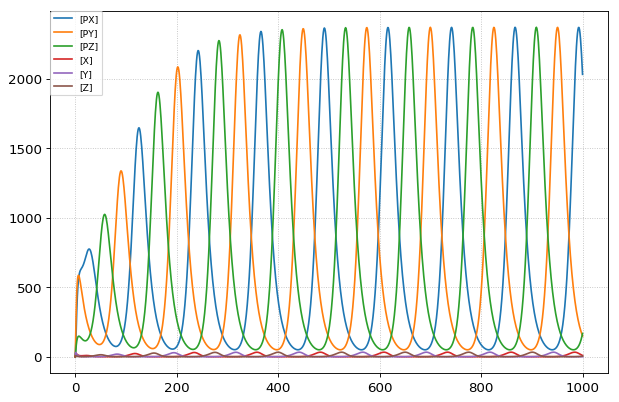

In [5]:
# perform the simulation
r.reset()
result = r.simulate(start=0, end=1000, steps=1000)

# create a DataFrame from the results
df = pd.DataFrame(result, columns=r.timeCourseSelections)
display(df.head(15))

# which variables are part of the results
# print(r.timeCourseSelections)
# plot the results
r.plot(result)

## Additional analysis
We can now perform additional analysis and plots with the simulation results, for instance plot the results in the phase plot.

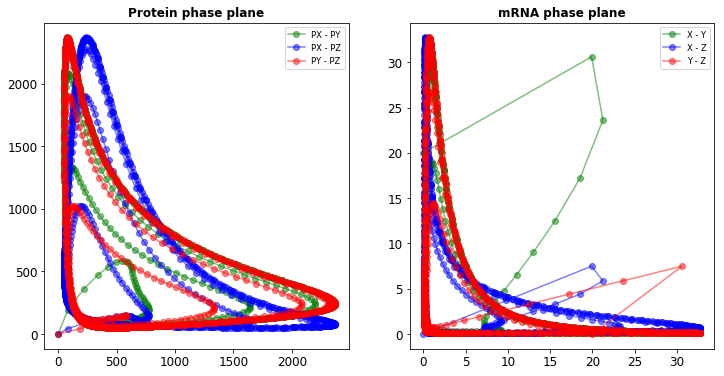

In [6]:
# Figure of phase plane behavior of protein and mRNA
a_value = 0.5
f, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
ax1.plot(df['[PX]'], df['[PY]'], 'o-', color="green", label="PX - PY", alpha=a_value)
ax1.plot(df['[PX]'], df['[PZ]'], 'o-', color="blue", label="PX - PZ", alpha=a_value)
ax1.plot(df['[PY]'], df['[PZ]'], 'o-', color="red", label="PY - PZ", alpha=a_value)
ax1.set_title("Protein phase plane")

ax2.plot(df['[X]'], df['[Y]'], 'o-', color="green", label="X - Y", alpha=a_value)
ax2.plot(df['[X]'], df['[Z]'], 'o-', color="blue", label="X - Z", alpha=a_value)
ax2.plot(df['[Y]'], df['[Z]'], 'o-', color="red", label="Y - Z", alpha=a_value)
ax2.set_title("mRNA phase plane")

for ax in (ax1, ax2):
    ax.legend()

plt.show()

## Applying pre-processing (changing parameters)
A common step in a simulation experiment is the adjustment of model parameters before simulation. When changing the parameter values for the protein **copies per promoter** `tps_repr` and the **leakiness in protein copies per promoter** `tps_active` like stated below, the system's behavior switches from sustained oscillations to damped oscillations. The simulation experiment leading to that behavior is described as: 

```
<changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='ps_0']/@value" newValue="1.3e-05"/>
<changeAttribute target="/sbml:sbml/sbml:model/sbml:listOfParameters/sbml:parameter[@id='ps_a']/@value" newValue="0.013"/>
```

* Import the model as above.
* Change the value of the parameter `tps_repr (ps_0)` from 0.0005 to 1.3e-05 (decrease copies per promoter).
* Change the value of the parameter `tps_active (ps_a)` from 0.5 to 0.013 (increase leakiness in protein copy number).
* Select a deterministic method
* Run a uniform time course for the duration of 1000~min with an output interval of 1~min
* Plot the amount of lacI, tetR and cI against time in a 2D Plot.

--------------------------------------------------------------------------------
Before
--------------------------------------------------------------------------------
r.ps_0: 0.0005
r.ps_a: 0.5
--------------------------------------------------------------------------------
After
--------------------------------------------------------------------------------
r.ps_0: 1.3e-05
r.ps_a: 0.013


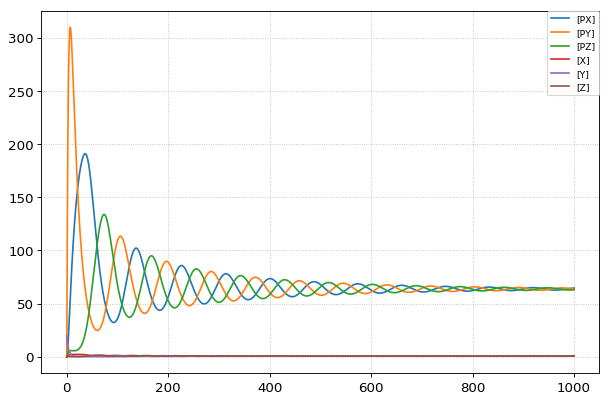

In [7]:
# full reset of model
r.resetAll()

print("-"*80)
print("Before")
print("-"*80)
print("r.ps_0:", r.ps_0)
print("r.ps_a:", r.ps_a)

# change parameters
r.ps_0 = 1.3E-5
r.ps_a = 0.013

print("-"*80)
print("After")
print("-"*80)
print("r.ps_0:", r.ps_0)
print("r.ps_a:", r.ps_a)

result = r.simulate(start=0, end=1000, steps=1000)
r.plot(result)

## Stochastic simulation

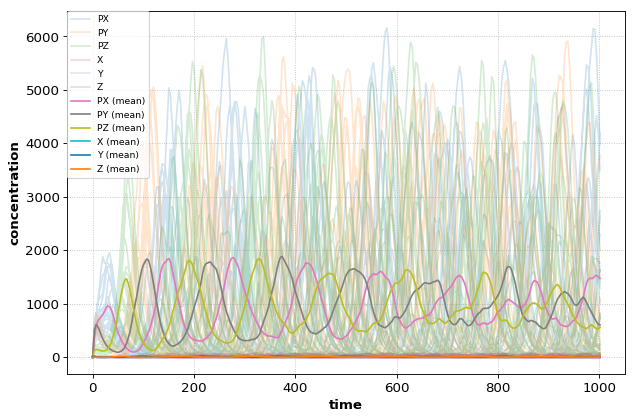

In [8]:
# use a stochastic solver
r.integrator = 'gillespie'
r.integrator.seed = 1234
# selections specifies the output variables in a simulation
selections = ['time'] + r.getBoundarySpeciesIds() \
                      + r.getFloatingSpeciesIds()
r.integrator.variable_step_size = False

# run repeated simulation
Ncol = len(r.selections)
Nsim = 20
points = 301
s_sum = np.zeros(shape=[points, Ncol])
for k in range(Nsim):
    r.resetToOrigin()
    s = r.simulate(0, 1001, points, selections=selections)
    s_sum += s
    # use show=False to add traces to the current plot
    # instead of starting a new one, equivalent to MATLAB hold on
    r.plot(s, alpha=0.2, show=False)

# add mean curve, legend, show everything and set labels, titles, ...
fig = te.plot(s[:,0], s_sum[:,1:]/Nsim, 
              names=[x + ' (mean)' for x in selections[1:]], 
              title="Stochastic simulation", 
              xtitle="time", ytitle="concentration")